In [26]:
# moutning drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# example of loading the cifar100 dataset
from keras.datasets.cifar100 import load_data
from keras.utils import to_categorical
(trainX, trainy), (testX, testy) = load_data(label_mode='fine')

print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


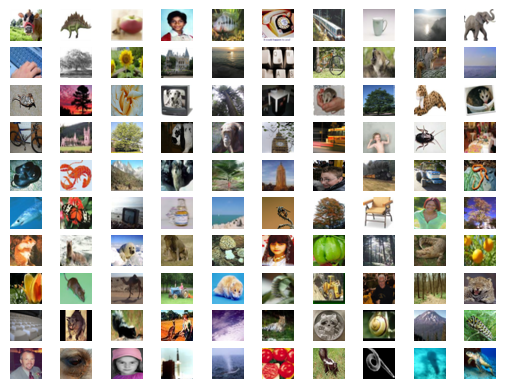

In [28]:
from keras.datasets.cifar100 import load_data
from matplotlib import pyplot
for i in range(100):
	pyplot.subplot(10, 10, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(trainX[i])
pyplot.show()

In [29]:
# def define_discriminator(in_shape=(32,32,3)):
# 	model = Sequential()
# 	model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
# 	model.add(LeakyReLU(alpha=0.2))
# 	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
# 	model.add(LeakyReLU(alpha=0.2))
# 	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
# 	model.add(LeakyReLU(alpha=0.2))
# 	model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
# 	model.add(LeakyReLU(alpha=0.2))

# 	# classifier
# 	model.add(Flatten())
# 	model.add(Dropout(0.4))
# 	model.add(Dense(100, activation='softmax'))  # Change 1 to 100

# 	# compile model
# 	opt = Adam(learning_rate=0.0002, beta_1=0.5)
# 	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4096)              413696    
                                                                 
 leaky_re_lu_56 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_7 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose_21 (Conv2  (None, 8, 8, 128)         524416    
 DTranspose)                                                     
                                                                 
 leaky_re_lu_57 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_22 (Conv2  (None, 16, 16, 128)       262272    
 DTranspose)                                         

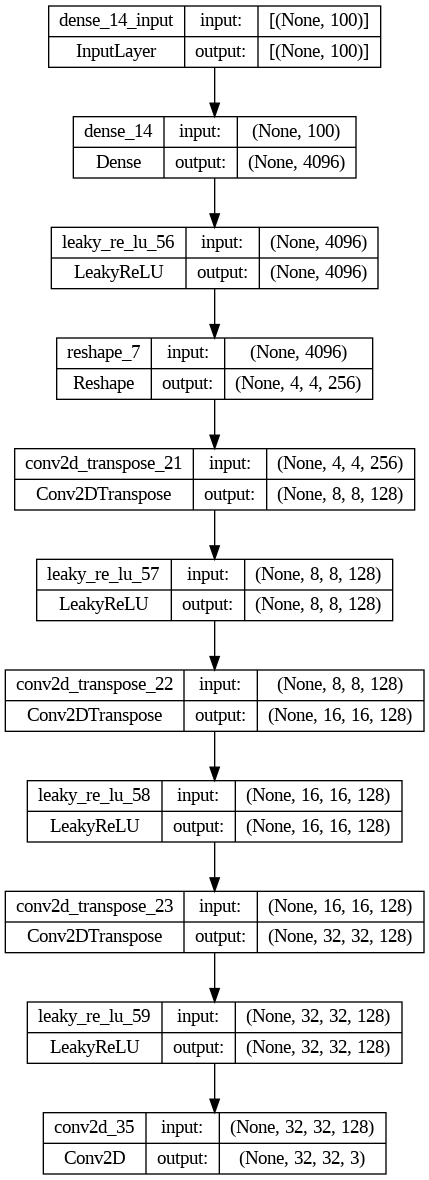

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model

# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	n_nodes = 256 * 4 * 4
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((4, 4, 256)))
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))

	return model

latent_dim = 100
model = define_generator(latent_dim)
model.summary()
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu_60 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_61 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_62 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_39 (Conv2D)          (None, 4, 4, 256)       

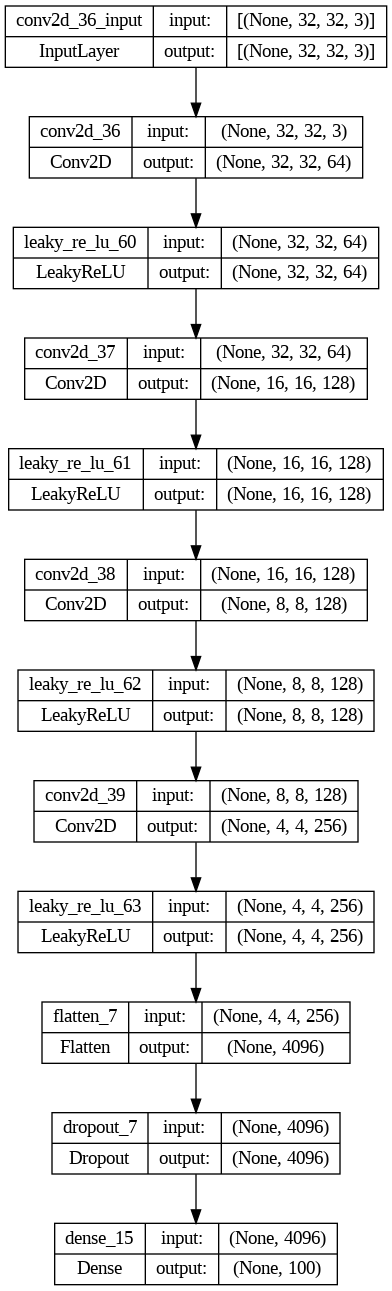

In [31]:
# defining the discriminator model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model

# define the standalone discriminator model
def define_discriminator(in_shape=(32,32,3)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))

	# classifier
	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(100, activation='sigmoid'))
	# compile model
	opt = Adam(learning_rate=0.001, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

model = define_discriminator()
model.summary()
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [32]:
opt = Adam(learning_rate=0.001, beta_1=0.5)

In [ ]:
# dcgan on cifar10
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot

def define_discriminator(in_shape=(32,32,3)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))

	# classifier
	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(learning_rate=0.001, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

def define_generator(latent_dim):
	model = Sequential()
	n_nodes = 256 * 4 * 4
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((4, 4, 256)))
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
	return model

def define_gan(g_model, d_model):
	d_model.trainable = False
	model = Sequential()
	model.add(g_model)
	model.add(d_model)
	opt = Adam(learning_rate=0.001, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

def load_real_samples():
	(trainX, _), (_, _) = load_data()
	X = trainX.astype('float32')
	X = (X - 127.5) / 127.5
	return X

def generate_real_samples(dataset, n_samples):
	ix = randint(0, dataset.shape[0], n_samples)
	X = dataset[ix]
	y = ones((n_samples, 1))
	return X, y

def generate_latent_points(latent_dim, n_samples):
	x_input = randn(latent_dim * n_samples)
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

def generate_fake_samples(g_model, latent_dim, n_samples):
	x_input = generate_latent_points(latent_dim, n_samples)
	X = g_model.predict(x_input)
	y = zeros((n_samples, 1))
	return X, y

def save_plot(examples, epoch, n=7):
    examples = (examples + 1) / 2.0
    for i in range(n * n):
        pyplot.subplot(n, n, 1 + i)
        pyplot.axis('off')
        pyplot.imshow(examples[i])
    filename = 'generator_plot_e%03d.png' % (epoch + 1)
    pyplot.savefig(filename)
    pyplot.close()

def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
    X_real, y_real = generate_real_samples(dataset, n_samples)
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real * 100, acc_fake * 100))
    save_plot(x_fake, epoch)
    filename = 'generator_model_e%03d.h5' % (epoch + 1)
    g_model.save(filename)

def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	for i in range(n_epochs):
		for j in range(bat_per_epo):
			X_real, y_real = generate_real_samples(dataset, half_batch)
			d_loss1, _ = d_model.train_on_batch(X_real, y_real)
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
			X_gan = generate_latent_points(latent_dim, n_batch)
			y_gan = ones((n_batch, 1))
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)

latent_dim = 100
d_model = define_discriminator()
g_model = define_generator(latent_dim)
gan_model = define_gan(g_model, d_model)
dataset = load_real_samples()
train(g_model, d_model, gan_model, dataset, latent_dim)

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 5ms/step
>4, 232/390, d1=0.668, d2=0.632 g=1.022
2/2 [==============================] - 0s 5ms/step
>4, 233/390, d1=0.616, d2=0.686 g=1.095
2/2 [==============================] - 0s 5ms/step
>4, 234/390, d1=0.619, d2=0.723 g=1.159
2/2 [==============================] - 0s 3ms/step
>4, 235/390, d1=0.692, d2=0.699 g=1.092
2/2 [==============================] - 0s 4ms/step
>4, 236/390, d1=0.664, d2=0.699 g=1.311
2/2 [==============================] - 0s 6ms/step
>4, 237/390, d1=0.715, d2=0.505 g=1.593
2/2 [==============================] - 0s 6ms/step
>4, 238/390, d1=0.736, d2=0.455 g=1.382
2/2 [==============================] - 0s 5ms/step
>4, 239/390, d1=0.630, d2=0.612 g=1.121
2/2 [==============================] - 0s 4ms/step
>4, 240/390, d1=0.582, d2=0.689 g=1.043
2/2 [==============================] - 0s 4ms/step
>4, 241/390, d1=0.621, d2=0.713 g=1.031
2/2 [==============================] - 

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 7ms/step
>14, 232/390, d1=0.000, d2=0.000 g=17.563
2/2 [==============================] - 0s 4ms/step
>14, 233/390, d1=0.000, d2=0.000 g=18.037
2/2 [==============================] - 0s 6ms/step
>14, 234/390, d1=0.000, d2=0.000 g=18.051
2/2 [==============================] - 0s 5ms/step
>14, 235/390, d1=0.000, d2=0.000 g=17.951
2/2 [==============================] - 0s 5ms/step
>14, 236/390, d1=0.000, d2=0.000 g=17.759
2/2 [==============================] - 0s 4ms/step
>14, 237/390, d1=0.000, d2=0.000 g=17.937
2/2 [==============================] - 0s 6ms/step
>14, 238/390, d1=0.000, d2=0.000 g=17.966
2/2 [==============================] - 0s 4ms/step
>14, 239/390, d1=0.000, d2=0.000 g=17.576
2/2 [==============================] - 0s 5ms/step
>14, 240/390, d1=0.000, d2=0.000 g=17.676
2/2 [==============================] - 0s 6ms/step
>14, 241/390, d1=0.000, d2=0.000 g=17.889
2/2 [==============

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 5ms/step
>24, 232/390, d1=0.000, d2=0.000 g=58.156
2/2 [==============================] - 0s 5ms/step
>24, 233/390, d1=0.000, d2=0.000 g=59.065
2/2 [==============================] - 0s 4ms/step
>24, 234/390, d1=0.000, d2=0.000 g=59.100
2/2 [==============================] - 0s 5ms/step
>24, 235/390, d1=0.000, d2=0.000 g=58.431
2/2 [==============================] - 0s 4ms/step
>24, 236/390, d1=0.000, d2=0.000 g=58.245
2/2 [==============================] - 0s 6ms/step
>24, 237/390, d1=0.000, d2=0.000 g=57.830
2/2 [==============================] - 0s 6ms/step
>24, 238/390, d1=0.000, d2=0.000 g=58.361
2/2 [==============================] - 0s 4ms/step
>24, 239/390, d1=0.000, d2=0.000 g=61.697
2/2 [==============================] - 0s 6ms/step
>24, 240/390, d1=0.000, d2=0.000 g=56.539
2/2 [==============================] - 0s 4ms/step
>24, 241/390, d1=0.000, d2=0.000 g=59.297
2/2 [==============

2/2 [==============================] - 0s 6ms/step
>31, 1/390, d1=0.000, d2=0.000 g=24.054
2/2 [==============================] - 0s 8ms/step
>31, 2/390, d1=0.000, d2=0.000 g=24.802
2/2 [==============================] - 0s 5ms/step
>31, 3/390, d1=0.000, d2=0.000 g=24.342
2/2 [==============================] - 0s 6ms/step
>31, 4/390, d1=0.000, d2=0.000 g=23.142
2/2 [==============================] - 0s 5ms/step
>31, 5/390, d1=0.000, d2=0.000 g=23.608
2/2 [==============================] - 0s 5ms/step
>31, 6/390, d1=0.000, d2=0.000 g=24.173
2/2 [==============================] - 0s 5ms/step
>31, 7/390, d1=0.000, d2=0.000 g=23.341
2/2 [==============================] - 0s 8ms/step
>31, 8/390, d1=0.000, d2=0.000 g=22.498
2/2 [==============================] - 0s 9ms/step
>31, 9/390, d1=0.000, d2=0.000 g=22.432
2/2 [==============================] - 0s 4ms/step
>31, 10/390, d1=0.000, d2=0.000 g=22.241
2/2 [==============================] - 0s 8ms/step
>31, 11/390, d1=0.000, d2=0.000 g=22.7

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# import os

# current_directory = os.getcwd()
# model_filename = 'generator_model_020.h5'

# model_file_path = os.path.join(current_directory, model_filename)

# print("Current Working Directory:", current_directory)
# print("Full Path to Model File:", model_file_path)

# if os.path.exists(model_file_path):
#     print("Model file exists.")
# else:
#     print("Model file does not exist.")


In [ ]:
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot

def generate_latent_points(latent_dim, n_samples):
	x_input = randn(latent_dim * n_samples)
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

def create_plot(examples, n):
	for i in range(n * n):
		pyplot.subplot(n, n, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(examples[i, :, :])
	pyplot.show()

model = load_model('generator_model_e010.h5')
latent_points = generate_latent_points(100, 100)
X = model.predict(latent_points)
X = (X + 1) / 2.0
create_plot(X, 10)